# Exploratory data analysis

In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris #iris data set

import pandas as pd
import numpy as np


## Load and convert iris data to a dataframe

For this notebook, we will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html. Here, we will work with his measurements of petal length.


In [2]:
# for more information refer: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#
iris = load_iris()
df=pd.DataFrame(iris.data,columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
df.loc[0:49,'species']='setosa'
df.loc[50:99,'species']='versicolor'
df.loc[100:149,'species']='virginica'

In [3]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## Plotting a histogram of iris data

In [4]:
#set data for histogram
#The subset of the Iris data set containing the Iris virginica petal lengths in units of centimeters (cm) is stored in the NumPy array 

setosa_petal_length=df[df.species=='setosa']['petal length (cm)']
versicolor_petal_length=df[df.species=='versicolor']['petal length (cm)']
virginica_petal_length=df[df.species=='virginica']['petal length (cm)']

setosa_petal_width=df[df.species=='setosa']['petal width (cm)']
versicolor_petal_width=df[df.species=='versicolor']['petal width (cm)']
virginica_petal_width=df[df.species=='virginica']['petal width (cm)']

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings.

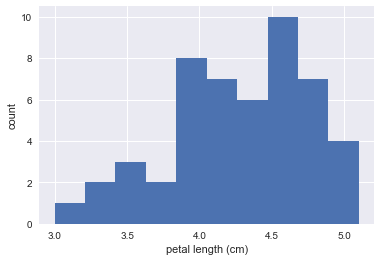

In [42]:
# Set default Seaborn style
sns.set()
# Plot histogram of versicolor petal lengths
_=plt.hist(versicolor_petal_length)

# Label axes
_=plt.xlabel('petal length (cm)')
_=plt.ylabel('count')

# Show histogram
plt.show()


## Adjusting the number of bins in a histogram
The histogram we just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: we choose the number of bins to be the square root of the number of samples. Now, plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins.

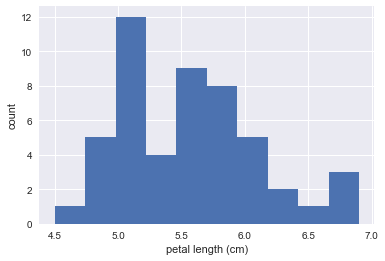

In [6]:
#Adjusting the number of bins in a histogram

# Set default Seaborn style
sns.set()

# Compute number of data points: n_data
n_data=len(virginica_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins=np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins=int(n_bins)

# Plot histogram of versicolor petal lengths
plt.hist(virginica_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()


## Bee swarm plots
We'll make a bee swarm plot of the iris petal lengths. Our x-axis contain each of the three species, and the y-axis the petal lengths. 

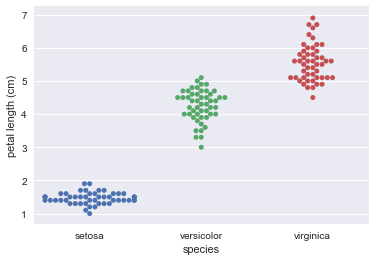

In [7]:
# Create bee swarm plot with Seaborn's default settings

# Label the axes
sns.swarmplot(x='species', y='petal length (cm)', data=df)
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

Interpretation: I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

## Empirical cumulative distribution functions (ECDF)
Here we will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. We will use this function over and over again throughout this notebook and its sequel. ECDFs are among the most important plots in statistical analysis.

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

## Plotting the ECDF
We will now use our ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. We will then plot the ECDF. Recall that our ecdf() function returns two arrays so we will need to unpack them. 

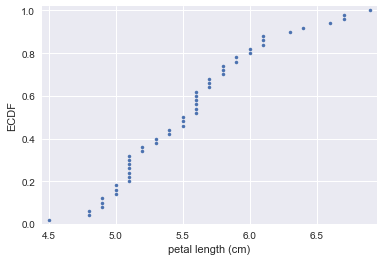

In [9]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(virginica_petal_length)

# Generate plot
plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.margins(0.02)

## Comparison of ECDFs
ECDFs also allow us to compare two or more distributions (though plots get cluttered if we have too many). Here, we will plot ECDFs for the petal lengths of all three iris species. We already wrote a function to generate ECDFs so we can put it to good use!

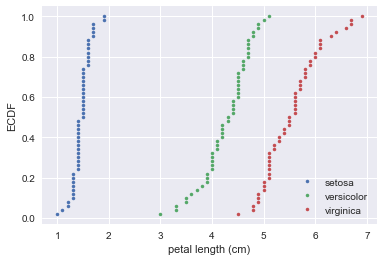

In [10]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.plot(x_set,y_set,marker='.',linestyle='none')
plt.plot(x_vers, y_vers,marker='.',linestyle='none')
plt.plot(x_virg, y_virg,marker='.',linestyle='none')



# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

# Computing Mean, Median & percentiles...

## Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [11]:
# Compute the mean: mean_length_vers
mean_length_vers=np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


## Computing percentiles
We will compute the percentiles of petal length of Iris versicolor.

In [12]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers=np.percentile(versicolor_petal_length,percentiles)

# Print the result
print (ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


## Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, we will plot the percentiles of Iris versicolor petal lengths we calculated in the last example on the ECDF plot we generated earlier. 

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, we will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

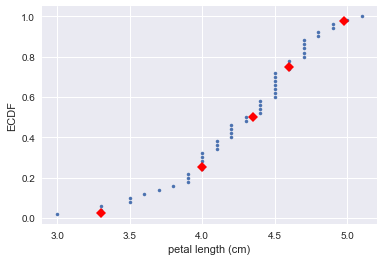

In [13]:
# Plot the ECDF
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. We'll make a box plot of the iris petal lengths. We have a pandas DataFrame, df, which contains the petal length data. We'll inspect the data frame df in the IPython shell using df.head() to make sure we know what the pertinent columns are.

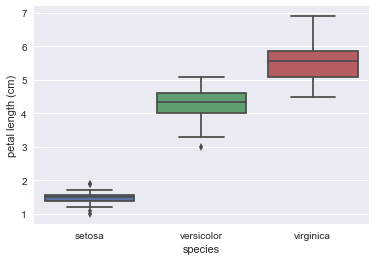

In [14]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df)
# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')
# Show the plot
plt.show()

# Variance and standard deviation

## Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though we may already know how to compute variances. In this example, we will explicitly compute the variance of the petal length of Iris veriscolor. We will then use np.var() to compute it.

In [15]:
# Array of differences to mean: differences
differences=versicolor_petal_length-np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq=differences**2

# Compute the mean square difference: variance_explicit
variance_explicit=np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np=np.var(versicolor_petal_length)


# Print the results
print(variance_explicit,variance_np)


0.21640000000000012 0.21640000000000012


## The standard deviation and the variance 
The standard deviation is the square root of the variance. We will see this for ourself by computing the standard deviation using np.std() and comparing it to what we get by computing the variance with np.var() and then computing the square root.

In [16]:
# Compute the variance: variance
variance=np.var(versicolor_petal_length)

# Print the square root of the variance
print (np.sqrt(variance))

# Print the standard deviation
print (np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


# Covariance and Pearson correlation coefficient

## Scatter plots
When we made bee swarm plots, box plots, and ECDF plots in previous examples, we compared the petal lengths of different species of iris. But what if we want to compare two properties of a single species? This is exactly what we will do in this example. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

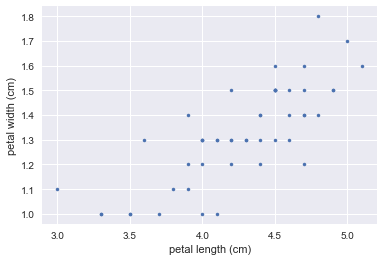

In [17]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
plt.xlabel('petal length (cm)')

plt.ylabel('petal width (cm)')


# Show the result
plt.show()

## Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

The I. versicolor petal length and width are related, we include the scatter plot we generated in a previous example.

In [18]:
# Compute the covariance matrix: covariance_matrix

covariance_matrix=np.cov(versicolor_petal_length,versicolor_petal_width)

# Print covariance matrix
print (covariance_matrix)

# Extract covariance of length and width of petals: petal_cov

petal_cov=covariance_matrix[0,1]

# Print the length/width covariance

print (petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient
The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (why?), and the value we are after is entry [0,1].

In this example, we will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. We will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot we generated in a previous example to keep in mind how the petal width and length are related.

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(versicolor_petal_length,versicolor_petal_width)

# Print the result
print(r)

0.7866680885228168


# Probabilistic logic and statistical inference

## Generating random numbers using the np.random module
We will be hammering the np.random module for the rest of the examples. Actually, we will probably call functions from this module more than any other while wearing our hacker statistician hat. Let's start by taking its simplest function, np.random.random() for a test spin. The function returns a random number between zero and one. Call np.random.random() a few times in the IPython shell. We should see numbers jumping around between zero and one.

In this example, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

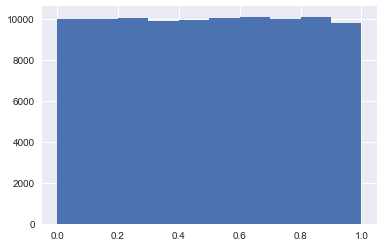

In [43]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_=plt.hist(random_numbers)

# Show the plot
plt.show()


## Bernoulli trials
We can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this example, we will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

In [21]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number=np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

## How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. We would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, we will do a simulation. We will perform 100 Bernoulli trials using the perform_bernoulli_trials() function we wrote in the previous example and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) We will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, we will plot a histogram describing the probability of the number of defaults.

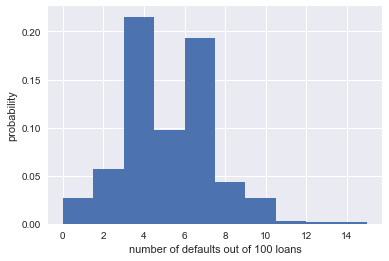

In [22]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults=np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,.05)


# Plot the histogram with default number of bins; label our axes
plt.hist(n_defaults, density=True)
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()

## Will the bank fail?
We will plot the number of defaults we got from the previous example, in our namespace as n_defaults, as a CDF. The ecdf() function we wrote earlier.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

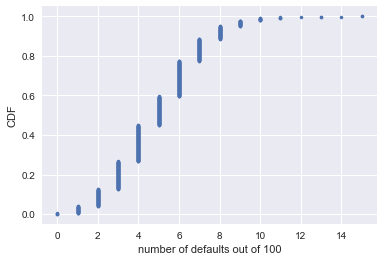

Probability of losing money = 0.022


In [23]:
# Compute ECDF: x, y
x,y=ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('number of defaults out of 100')
plt.ylabel('CDF')
# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money=np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

# Probability distributions and stories: The Binomial distribution

## Sampling out of the Binomial distribution
We will compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation we did in the last set of exercises using our custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that we are plotting is that of the Binomial distribution.

Note: For this example and all going forward, the random number generator is pre-seeded for us (with np.random.seed(42)) to save our typing that each time.

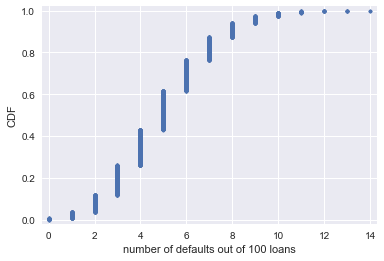

In [24]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults=np.random.binomial(100,.05, size=10000)

# Compute CDF: x, y
x,y=ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)

plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()



## Plotting the Binomial PMF
Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills we have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. We can generate an array like this using np.arange() and then subtracting 0.5 from the array.

We have already sampled out of the Binomial distribution during our exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

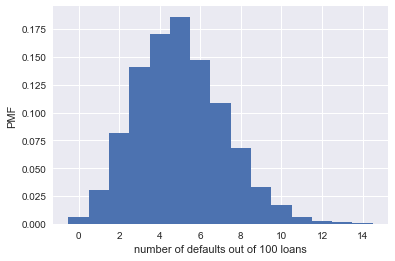

In [25]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults,density=True,bins=bins)

# Label axes
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('PMF')


# Show the plot
plt.show()

# Poisson processes and the Poisson distribution

## Relationship between Binomial and Poisson distributions
We just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if we think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. We will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, we will compute the mean and standard deviation of samples from a Binomial distribution with parameters n and p such that  np=10

In [26]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


## How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

## Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [27]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters=np.random.poisson(np.mean(251/115),size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

print (n_large/10000)

# Compute probability of getting seven or more: p_large
p_large=n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


0.0072
Probability of seven or more no-hitters: 0.0072


# Introduction to the Normal distribution

## The Normal PDF
In this example, we will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, we will plot a Normal PDF for various values of the variance.

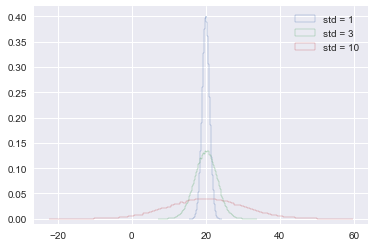

In [28]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,size=100000)
samples_std3=np.random.normal(20,3,size=100000)
samples_std10=np.random.normal(20,10,size=100000)

# Make histograms
_=plt.hist(samples_std1,bins=100,density=True,histtype='step')
_=plt.hist(samples_std3,bins=100,density=True,histtype='step')
_=plt.hist(samples_std10,bins=100,density=True,histtype='step')



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


## The Normal CDF
Now that we have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples we generated in the last example (in our namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

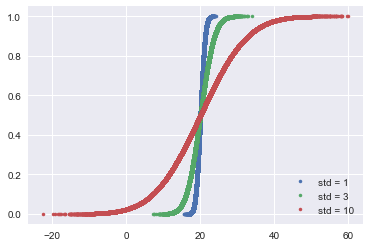

In [29]:
# Generate CDFs
x_std1, y_std1=ecdf(samples_std1)
x_std3, y_std3=ecdf(samples_std3)
x_std10, y_std10=ecdf(samples_std10)

# Plot CDFs
_=plt.plot(x_std1, y_std1,marker='.',linestyle='none')
_=plt.plot(x_std3, y_std3,marker='.',linestyle='none')
_=plt.plot(x_std10, y_std10,marker='.',linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


# The Normal distribution: Properties and warnings
Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning versicolor_petal_length. Are these close to Normally distributed?

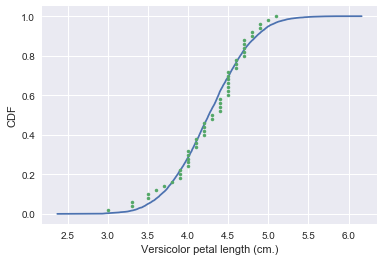

In [37]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(versicolor_petal_length)
sigma=np.std(versicolor_petal_length)


# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor=ecdf(samples)
x,y=ecdf(versicolor_petal_length)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Versicolor petal length (cm.)')
_ = plt.ylabel('CDF')
plt.show()

## If we have a story, we can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! We can always simulate it. We'll do that in this and the next exercise.

In earlier example, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, we will write a function to sample out of the distribution described by this story.

In [38]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

## Distribution of no-hitters and cycles
Now, we'll use our sampling function to compute the waiting time to observe two events. The mean waiting time for first event is 764, and the mean waiting time for second event is 715.

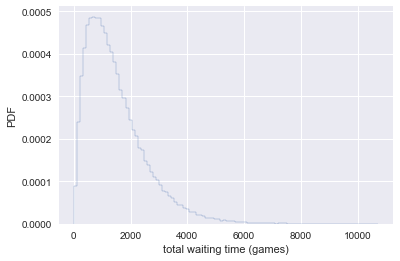

In [40]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,100000)

# Make the histogram
_=plt.hist(waiting_times,bins=100,density=True,histtype='step')


# Label axes
_=plt.xlabel('total waiting time (games)')
_=plt.ylabel('PDF')


# Show the plot
plt.show()
